<a href="https://colab.research.google.com/github/obeabi/Effective-Pandas-/blob/main/Chapter9_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


print('\Dependencies installed successfully!')

\Dependencies installed successfully!


In [63]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv( url , encoding='utf_8_sig')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


Question 1

Create a series from a numeric column that has the value of 'high' if it is equal to or above
the mean and 'low' if it is below the mean using .apply

In [6]:
df.barrels08.mean()

17.283899595906725

In [15]:
barrels08 = df.barrels08
m = barrels08.mean()
m

17.283899595906725

In [18]:
def column_categorize(my_list):
  """
   This function assigns high to values greater or equal than mean of colum values and low otherwise
  """
  try :
      if my_list >= mean_:
        return 'high'
      else:
        return 'low'
  except Exception as e:
    print(e)
  #finally:
    #print("function call complete!")


if __name__ == "__main__":
  barrels = df.barrels08
  mean_ = df.barrels08.mean()
  x = barrels.apply(column_categorize)

print(x)
  

0         low
1        high
2         low
3        high
4        high
         ... 
41139     low
41140     low
41141     low
41142     low
41143    high
Name: barrels08, Length: 41144, dtype: object


Question 2

Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using np.select.


In [30]:
def column_categorize2(my_list):
  """
  uses the numpy select method to create a series with high value when value is greeater or equal to mean
  """
  try:
    x = pd.Series(
        np.select([my_list.ge(my_list.mean())], ['high'], 'low')
        )
    return x
  except Exception as e:
    print(e)

if __name__ == "__main__":
  x = column_categorize2(df.barrels08)
  print(x)

 





0         low
1        high
2         low
3        high
4        high
         ... 
41139     low
41140     low
41141     low
41142     low
41143    high
Length: 41144, dtype: object


Question 3

Time the differences between the previous two solutions to see which is faster.

In [31]:
%%timeit
column_categorize2(df.barrels08)

3.33 ms ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
df.barrels08.apply(column_categorize)

10.4 ms ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [39]:
df.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [59]:
df.cylinders.median()

6.0

In [60]:
df.cylinders.quantile(0.5)

6.0

Question 4

Replace the missing values of a numeric series with the median value.

In [64]:
# Replace missing values with median value
print('missing values in original series\n')
print(df['cylinders'].isna().sum())
df['cylinders'] = df['cylinders'].fillna( df.cylinders.quantile(0.5) )
print('\nmissing values in after filling missing values with median :', df.cylinders.isna().sum())


missing values in original series

206

missing values in after filling missing values with median : 0


Question 5

Clip the values of a numeric series to between to 10th and 90th percentiles.

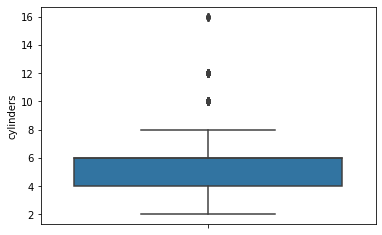

In [65]:
# Before clipping
sns.boxplot( y = 'cylinders', data = df)
plt.show()

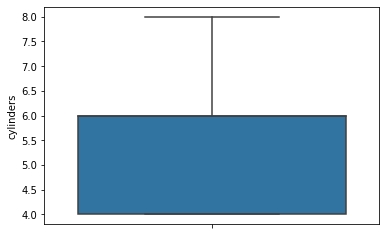

In [66]:
# After clipping series
df['cylinders'].clip(lower = df.cylinders.quantile(0.1), \
                     upper = df['cylinders']. quantile(0.9),
                     inplace = True)

sns.boxplot( y = 'cylinders', data = df)
plt.show()